# EE45 Update 2 - Krishna Pochana + Kevin Gauld

## Imports

In [73]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

## Load in the dataset

In [74]:
data = pickle.load(open('out2.pkl', 'rb'))
X = np.array(data[0])
y = np.array(data[1])

## Show the data

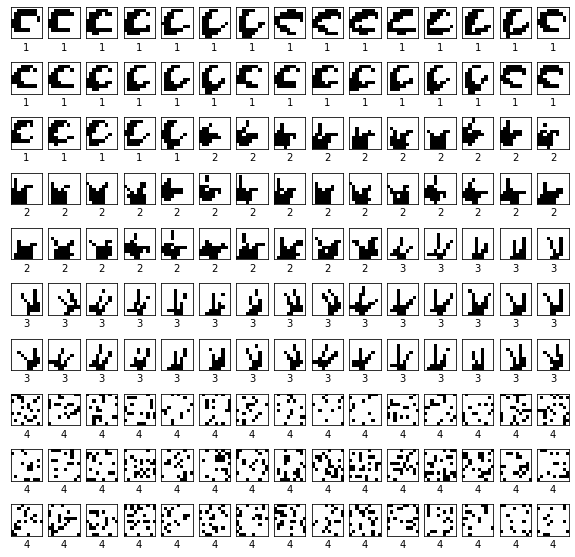

In [79]:
plt.figure(figsize=(10,10))
for i in range(len(X)):
    plt.subplot(10,len(X)//10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
    
plt.show()

## Data preparation

In [83]:
X = X.reshape(len(X), 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit SGD model

In [84]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Classify + Show Accuracy

In [85]:
y_pred = sgd_clf.predict(X_test)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True]

Percentage correct:  96.66666666666667


## Average over 100 Trials

In [91]:
n_trials = 100
avg_acc = 0

for k in range(n_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
    sgd_clf.fit(X_train, y_train)
    y_pred = sgd_clf.predict(X_test)
    avg_acc += 100*np.sum(y_pred == y_test)/len(y_test)
    
print(n_trials, "trials; Average percent correct: ", avg_acc/n_trials)

100 trials; Average percent correct:  97.86666666666665
